In [1]:
# Rends nos tracés inline
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enjolive les graphes
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv("C:/Users/namor/Dropbox/Simplon/Programmation/Pandas/Projet Groupe/Video_Games_Sales_as_at_22_Dec_2016.csv", sep=",")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df[["Price"]]

KeyError: "None of [Index(['Price'], dtype='object')] are in the [columns]"

Suppression des valeurs nulles et inconnues

In [3]:
# Trouver les lignes avec des NaN
index_with_nan = df.index[df.isnull().any(axis=1)]

# Supprimer les lignes avec des NaN
df.drop(index_with_nan,0, inplace=True)

In [4]:
# Supprimer les lignes égale 0
indexNames = df[ (df['NA_Sales'] == 0) | (df['EU_Sales'] == 0) | (df['JP_Sales'] == 0)].index
df.drop(indexNames , inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 13628
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1720 non-null   object 
 1   Platform         1720 non-null   object 
 2   Year_of_Release  1720 non-null   float64
 3   Genre            1720 non-null   object 
 4   Publisher        1720 non-null   object 
 5   NA_Sales         1720 non-null   float64
 6   EU_Sales         1720 non-null   float64
 7   JP_Sales         1720 non-null   float64
 8   Other_Sales      1720 non-null   float64
 9   Global_Sales     1720 non-null   float64
 10  Critic_Score     1720 non-null   float64
 11  Critic_Count     1720 non-null   float64
 12  User_Score       1720 non-null   object 
 13  User_Count       1720 non-null   float64
 14  Developer        1720 non-null   object 
 15  Rating           1720 non-null   object 
dtypes: float64(9), object(7)
memory usage: 228.4+ KB


In [6]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13156,OutRun 2006: Coast 2 Coast,PS2,2006.0,Racing,Sega,0.02,0.01,0.01,0.00,0.05,81.0,42.0,8.8,17.0,Sumo Digital,E
13215,Metroid Prime: Federation Force,3DS,2016.0,Action,Nintendo,0.02,0.01,0.01,0.00,0.05,64.0,56.0,5.1,219.0,"Next Level Games, Nintendo",T
13276,GrimGrimoire,PS2,2007.0,Strategy,Tecmo Koei,0.01,0.01,0.03,0.00,0.05,79.0,39.0,7.9,17.0,Vanilla Ware,E10+
13439,Wing Island,Wii,2006.0,Simulation,Konami Digital Entertainment,0.03,0.01,0.01,0.00,0.05,47.0,32.0,4.9,8.0,CAProduction,E


# Classement montrant la console de jeu qui se vend le plus

In [7]:
data_1 = df.groupby("Platform").mean().sort_values('Global_Sales',ascending=False)
data_1[['User_Count', 'Global_Sales']]

,User_Count,Global_Sales
Platform,,
Wii,167.453125,3.520391
PS,168.859649,2.802281
PC,8665.000000,2.370000
DS,72.204724,2.173150
XOne,1045.722222,2.037778
X360,491.168498,2.010989
PS4,1119.817308,1.951538
PS2,107.847390,1.933695
PS3,410.242588,1.606496


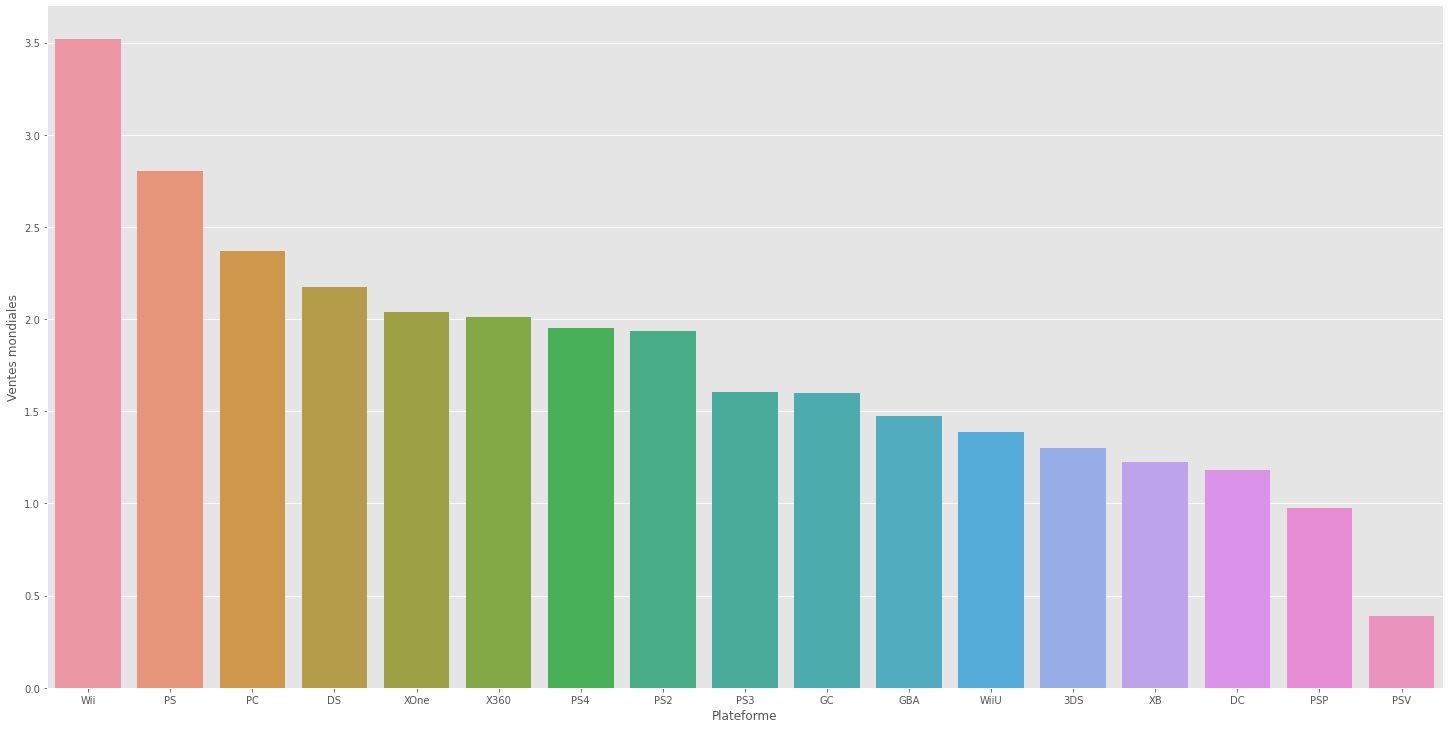

In [8]:
sns.catplot(x=data_1.index, y="Global_Sales", data=data_1, kind='bar',height=10, aspect=2)
plt.xlabel('Plateforme')
plt.ylabel('Ventes mondiales')

plt.show()

Text(0, 0.5, '')

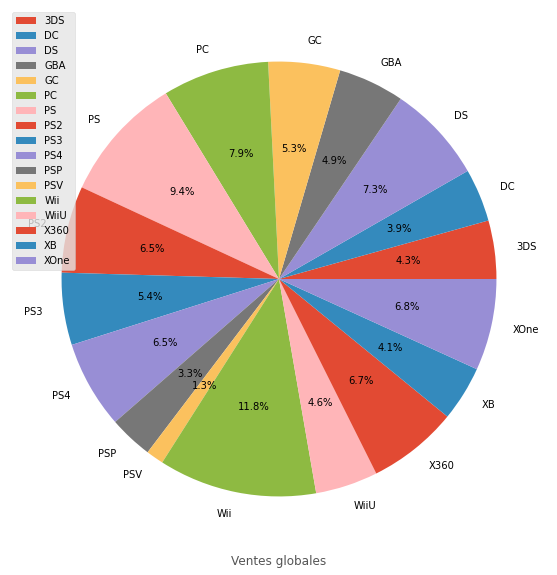

In [9]:
data_pie = df.groupby('Platform')[['Global_Sales']].mean()
data_pie.plot.pie(subplots=True, autopct="%.1f%%", figsize=(10, 10))
plt.xlabel('Ventes globales')
plt.ylabel('')

In [10]:
# data_2 = df.groupby("Publisher").mean().sort_values('Global_Sales', ascending = False).head(10)
# sns.catplot(x = "Global_Sales", y = data_2.index, data = data_2, kind = 'bar', height = 10, aspect = 2)
# plt.xlabel("Ventes mondiales")
# plt.ylabel("Plateformes")

# Classement montrant le genre de jeu qui se vend le plus

Text(6.799999999999997, 0.5, 'Ventes globales')

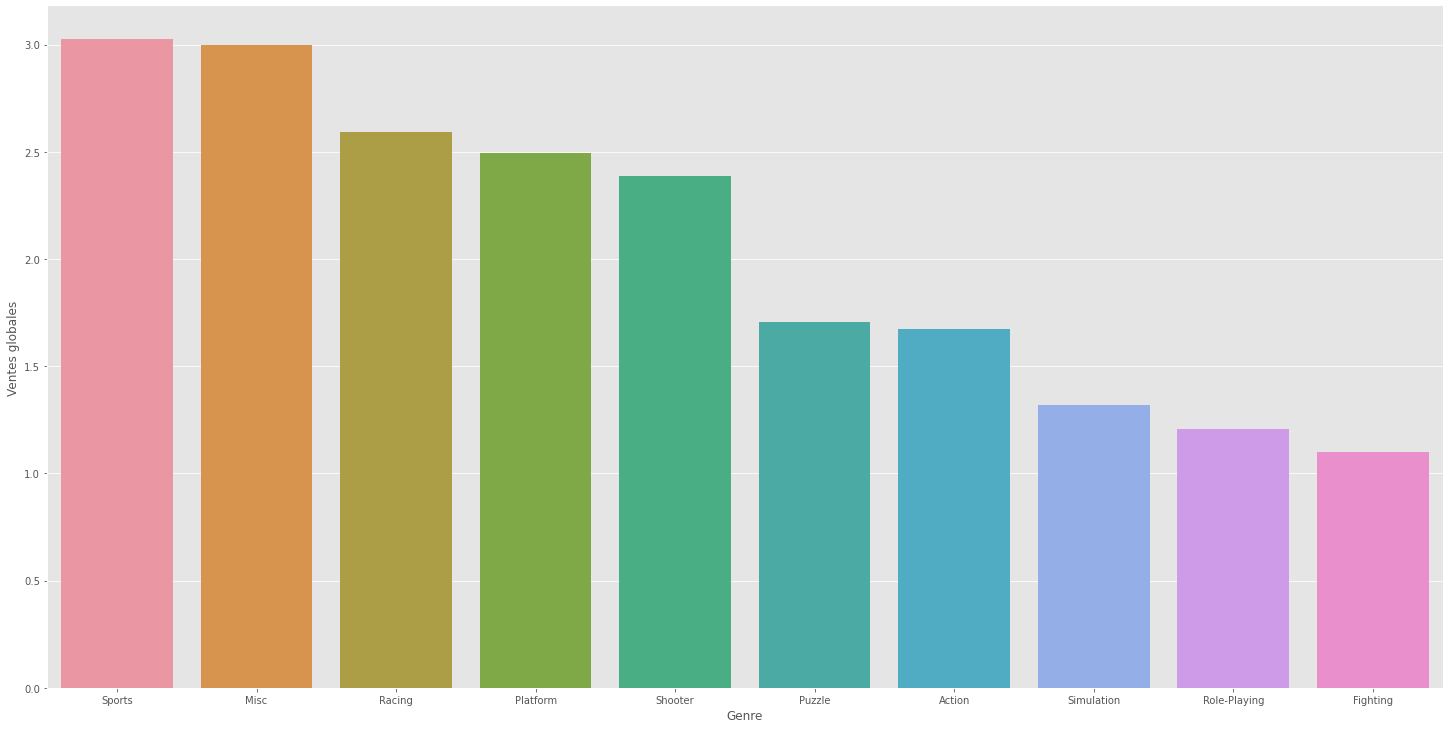

In [11]:
data_3 = df.groupby("Genre").mean().sort_values('Global_Sales', ascending = False).head(10)
sns.catplot(x = data_3.index, y = "Global_Sales", data = data_3, kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Genre")
plt.ylabel("Ventes globales")

Conversion des valeurs en numérique et float pour les rendre utilisables

In [12]:
# fig = sns.lmplot(x='Global_Sales', y='NA_Sales', hue='Platform', data=df)
# plt.xlabel('Ventes en Europe', fontsize=12)
# plt.ylabel('Ventes en Amérique', fontsize=12)

In [13]:
# Convertir les années en valeur numérique
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], downcast='integer')
df['User_Score'] = df['User_Score'].astype(float)

# Évolution des ventes globales en fonction du temps

In [14]:
data_4 = df.groupby("Year_of_Release").mean().sort_values('User_Count', ascending = False)
# sns.catplot(x= data_4.index, y= "Global_Sales", data= data_4, kind= 'bar', height= 10, aspect= 2)
# plt.xlabel("Année de sortie")
# plt.ylabel("Ventes mondiales")

Text(0, 0.5, 'Ventes globales')

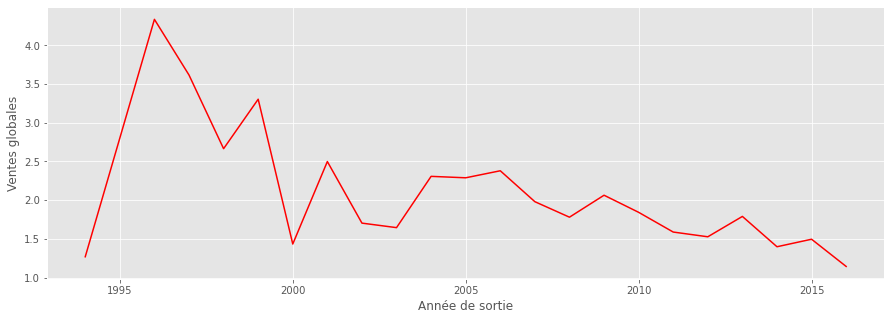

In [15]:
sns.lineplot(x= data_4.index, y='Global_Sales', data= data_4, color= 'red')
plt.xlabel("Année de sortie", fontsize=12)
plt.ylabel("Ventes globales", fontsize=12)

# Classement des jeux comptant le plus grand nombre de comptes utilisateurs

In [16]:
data_7 = df[['Name', 'User_Score', 'User_Count']].sort_values('User_Count', ascending = False).head(20)
data_7

,Name,User_Score,User_Count
303,The Witcher 3: Wild Hunt,9.2,10179.0
29,Call of Duty: Modern Warfare 3,3.4,8713.0
665,Half-Life 2,9.1,8665.0
149,The Last of Us,9.1,8003.0
171,Uncharted 4: A Thief's End,7.9,7064.0
623,Bloodborne,8.6,6383.0
154,Destiny,6.1,5380.0
150,LittleBigPlanet,6.8,5311.0
37,Call of Duty: Modern Warfare 3,3.2,5234.0
121,Uncharted 2: Among Thieves,8.8,5187.0


Text(-174.2, 0.5, 'Jeux')

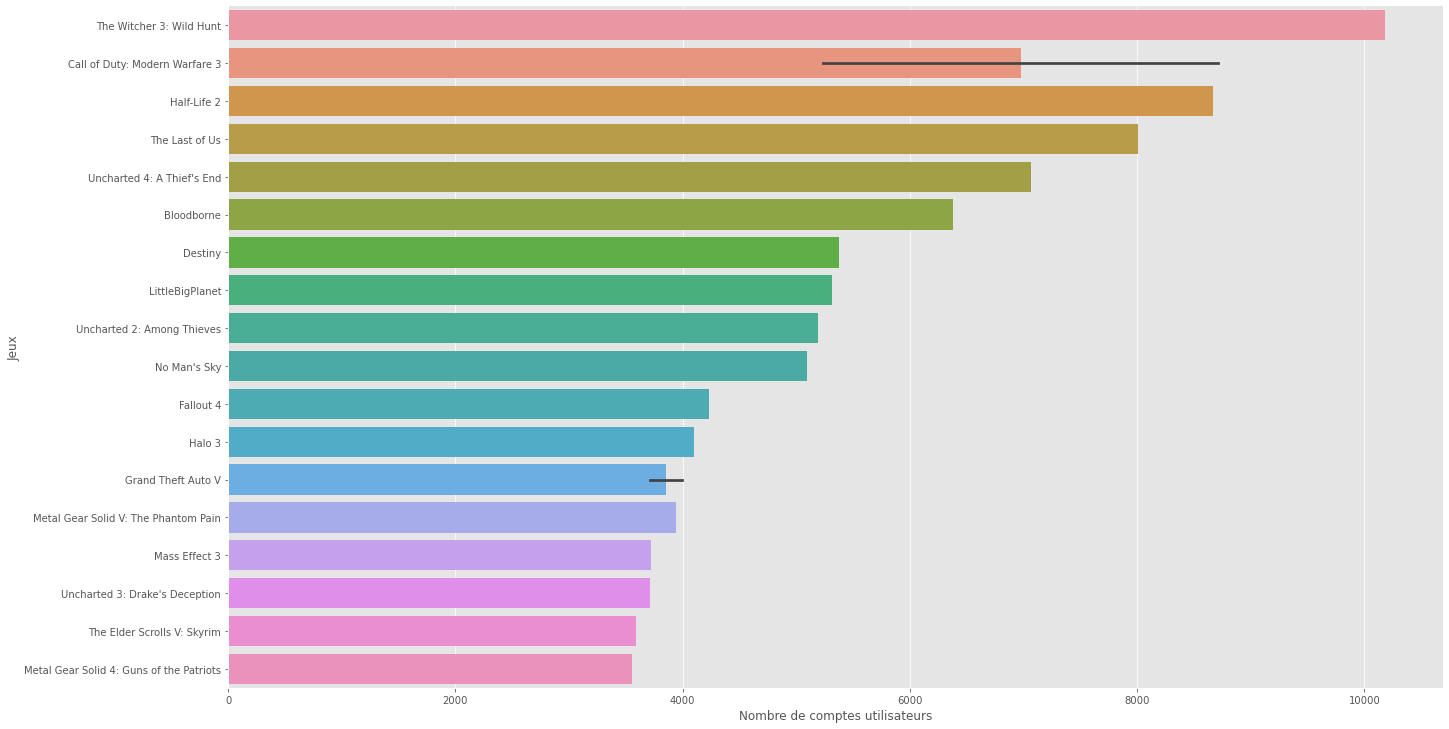

In [17]:
sns.catplot(x = "User_Count", y = "Name", data = df.sort_values('User_Count', ascending = False).head(20), kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Nombre de comptes utilisateurs")
plt.ylabel("Jeux")

# Classement des 20 meilleurs jeux en fonction des ventes globales

Text(-197.325, 0.5, 'Jeux')

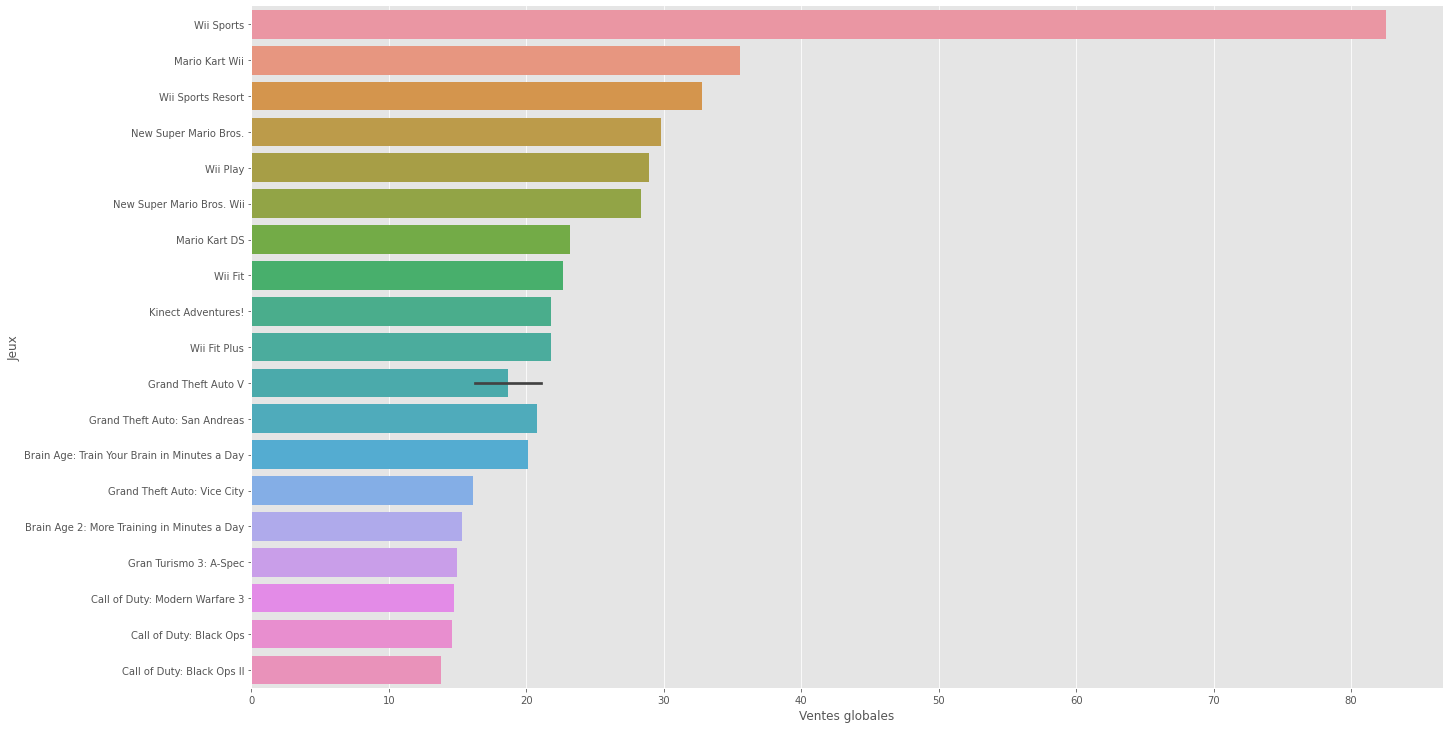

In [18]:
sns.catplot(x = "Global_Sales", y = "Name", data = df.sort_values('Global_Sales', ascending = False).head(20), kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Ventes globales")
plt.ylabel("Jeux")

# Classement des 20 meilleurs jeux en fonction des ventes globales en prenant en compte la taille des comptes utilisateurs

Text(-174.2, 0.5, 'Jeux')

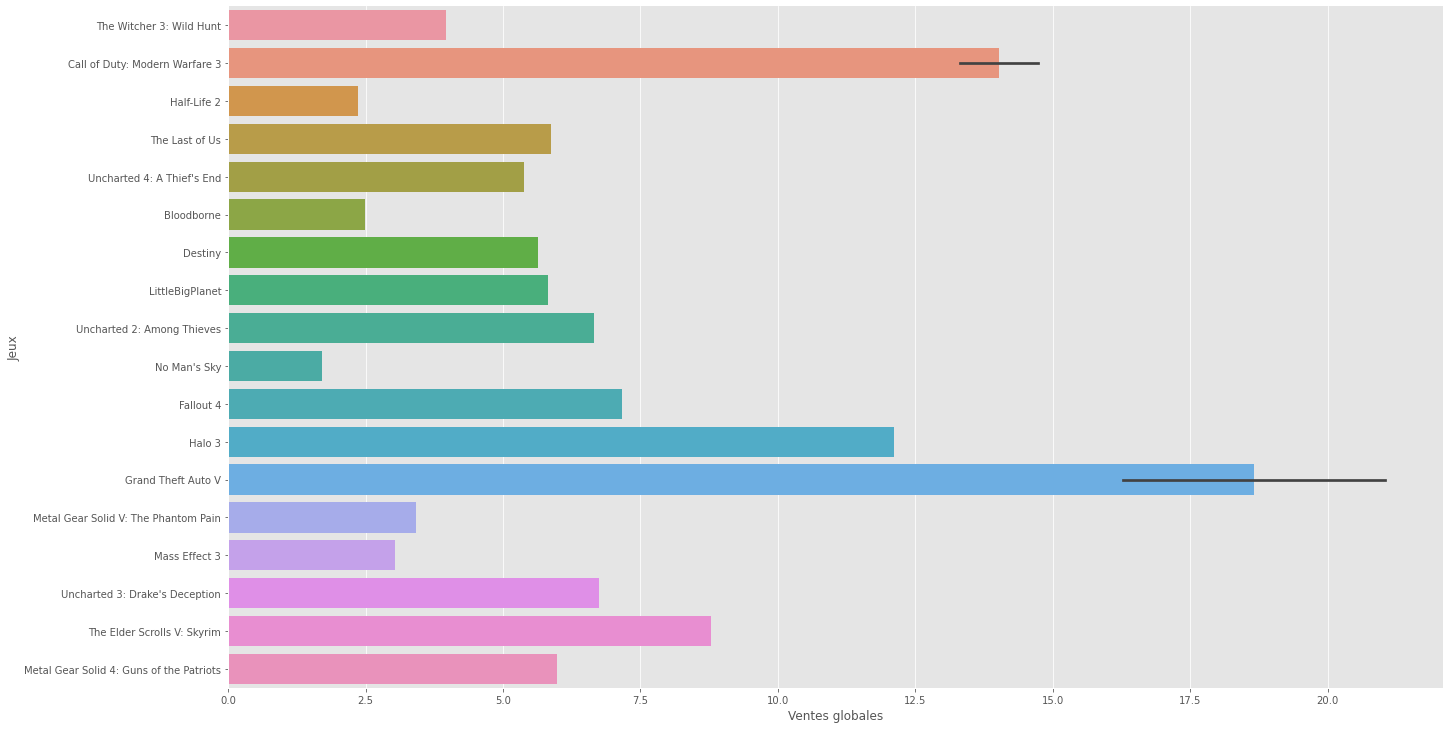

In [19]:
sns.catplot(x = "Global_Sales", y = "Name", data = df.sort_values('User_Count', ascending = False).head(20), kind = 'bar', height = 10, aspect = 2)
plt.xlabel("Ventes globales")
plt.ylabel("Jeux")

In [20]:
# data_5 = df.sort_values('User_Count', ascending = False).head(20)
# sns.catplot(x = "User_Score", y = "Name", data = data_5, kind = 'bar', height = 10, aspect = 2)
# plt.xlabel("Score utilisateur")
# plt.ylabel("Jeux")

# Spécialité de chaque console en fonction du genre de jeu en prenant en compte les notes utilisateurs

Text(114.0, 0.5, 'Plateforme')

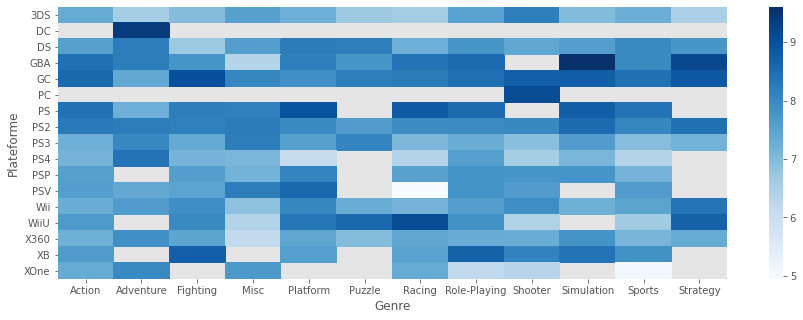

In [21]:
data_6 = df.pivot_table(values='User_Score',index='Platform',columns='Genre')
sns.heatmap(data_6, cmap='Blues')
plt.ylabel("Plateforme")

# Tendance de chaque genre de jeu en fonction du temps en prenant en compte les notes utilisateurs

Text(0.5, 24.0, 'Année de sortie')

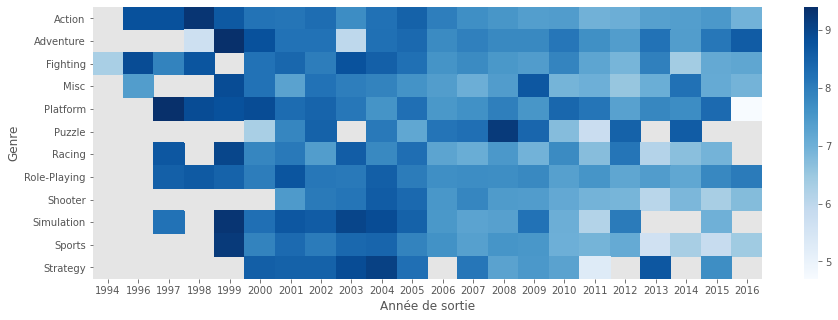

In [22]:
data_7 = df.pivot_table(values='User_Score',index='Genre',columns='Year_of_Release')
sns.heatmap(data_7, cmap='Blues')
plt.xlabel("Année de sortie")